# Military Aircraft Classification

You can find the dataset at the following url: https://zenodo.org/record/3464319#.YUiSrrgzaUk 
In general, MTARSI images are remote sensing images acquired from satellite images available on the Internet. 

In [30]:
# !pip install tensorflow

In [13]:
#import packages
import os
import numpy as np
import glob
import shutil

os.environ['TF_CPP_MIN_LOG_LEVEL'] = '1' 

import tensorflow as tf
import tensorflow.keras as keras 
import tensorflow.keras.layers as layers
from tensorflow.keras import layers
import matplotlib.pyplot as plt

In [14]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator, img_to_array, load_img # For image operations
from tensorflow.keras.models import Sequential # These are required for building our new model
from tensorflow.keras.layers import Dense # These are required for building our new model
from tensorflow.keras.applications.vgg16 import VGG16  # The Transfer Learning model to be used in this project...
from tensorflow.keras.applications.vgg16 import preprocess_input, decode_predictions
from PIL import Image # Python Imaging Library - For operations like: Image open, resize image, etc..
import matplotlib.pyplot as plt
import numpy as np

In [15]:
# Tensorflow version
tf.__version__

'2.3.0'

In [46]:
tf.test.gpu_device_name()

''

In [19]:
# First we will define train and test image paths...
train_files_path = "../airplanedataset/Train/"
test_files_path = "../airplanedataset/Test/"

# Let's load any airplane image from our dataset..
img = load_img(test_files_path + "B-52/3-1.jpg")

In [20]:
# What is the size?
print(img_to_array(img).shape)

(230, 266, 3)


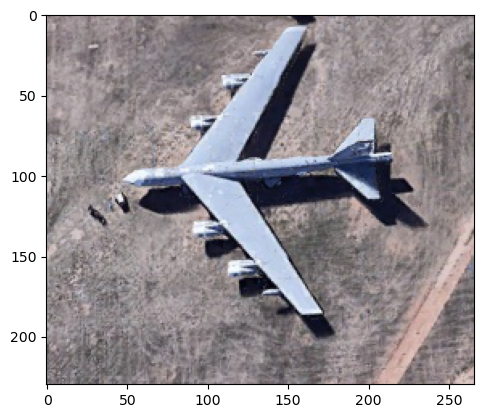

In [21]:
# Let's see this airplane
plt.imshow(img)
plt.show()

### Test and Train datasets

In [22]:
# build train and test datasets
train_data = ImageDataGenerator().flow_from_directory(train_files_path,target_size = (224,224))
test_data = ImageDataGenerator().flow_from_directory(test_files_path,target_size = (224,224))


Found 1812 images belonging to 5 classes.
Found 100 images belonging to 5 classes.


In [23]:
numberOfAirplaneTypes = 5  # If you have added other planes types (with airplane images in directories of course)
                           # then you must change this number...

## Building the Model 

In [24]:
# VGG16 pre-trained complex deep learning model
vgg = VGG16()

In [25]:
vgg_layers = vgg.layers
print(vgg_layers)

[<tensorflow.python.keras.engine.input_layer.InputLayer object at 0x000001BC23731A20>, <tensorflow.python.keras.layers.convolutional.Conv2D object at 0x000001BC25A68748>, <tensorflow.python.keras.layers.convolutional.Conv2D object at 0x000001BC25A68A20>, <tensorflow.python.keras.layers.pooling.MaxPooling2D object at 0x000001BC25A68D30>, <tensorflow.python.keras.layers.convolutional.Conv2D object at 0x000001BC25AC1940>, <tensorflow.python.keras.layers.convolutional.Conv2D object at 0x000001BC25AE5828>, <tensorflow.python.keras.layers.pooling.MaxPooling2D object at 0x000001BC25AE5898>, <tensorflow.python.keras.layers.convolutional.Conv2D object at 0x000001BC25AEE400>, <tensorflow.python.keras.layers.convolutional.Conv2D object at 0x000001BC25AF51D0>, <tensorflow.python.keras.layers.convolutional.Conv2D object at 0x000001BC25AF55C0>, <tensorflow.python.keras.layers.pooling.MaxPooling2D object at 0x000001BC25AF5E48>, <tensorflow.python.keras.layers.convolutional.Conv2D object at 0x000001BC

In [26]:
# vggmodel_layersize_tobe_used = len(vgg_layers) - 1 (minus 1 means I omit the last layer - the output layer)
vggmodel_layersize_tobe_used = len(vgg_layers) - 1

model = Sequential()
for i in range(vggmodel_layersize_tobe_used):
    model.add(vgg_layers[i]) 

In [27]:
# used VGG model
for layers in model.layers:
    layers.trainable = False
model.add(Dense(numberOfAirplaneTypes, activation="softmax"))
#print model
print(model.summary())

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
block1_conv1 (Conv2D)        (None, 224, 224, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 224, 224, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 112, 112, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 112, 112, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 112, 112, 128)     147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 56, 56, 128)       0         
_________________________________________________________________
block3_conv1 (Conv2D)        (None, 56, 56, 256)       2

In [52]:
# Compile Model
model.compile(loss = "categorical_crossentropy",
              optimizer = "rmsprop",
              metrics = ["accuracy"])
#batch size
batch_size = 25

In [53]:
epochs = 10
with tf.device('CPU'):
    history = model.fit(train_data, steps_per_epoch=1600//batch_size, epochs=epochs, validation_data=test_data, validation_steps= 800//batch_size)

Epoch 1/10
50/50 [==============================] - ETA: 0s - loss: 0.0022 - accuracy: 0.9987

W0228 14:19:09.167276 24640 data_adapter.py:1182] Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches (in this case, 25 batches). You may need to use the repeat() function when building your dataset.


50/50 [==============================] - 98s 2s/step - loss: 0.0022 - accuracy: 0.9987 - val_loss: 0.2551 - val_accuracy: 0.9300
Epoch 2/10
50/50 [==============================] - 91s 2s/step - loss: 9.8831e-04 - accuracy: 0.9994
Epoch 3/10
50/50 [==============================] - 92s 2s/step - loss: 3.6021e-05 - accuracy: 1.0000
Epoch 4/10
50/50 [==============================] - 93s 2s/step - loss: 4.2958e-04 - accuracy: 1.0000
Epoch 5/10
50/50 [==============================] - 91s 2s/step - loss: 7.0711e-05 - accuracy: 1.0000
Epoch 6/10
50/50 [==============================] - 92s 2s/step - loss: 0.0010 - accuracy: 0.9994
Epoch 7/10
50/50 [==============================] - 90s 2s/step - loss: 1.5514e-05 - accuracy: 1.0000
Epoch 8/10
50/50 [==============================] - 93s 2s/step - loss: 1.2688e-05 - accuracy: 1.0000
Epoch 9/10
50/50 [==============================] - 92s 2s/step - loss: 3.2071e-05 - accuracy: 1.0000
Epoch 10/10
50/50 [==============================] - 90s 2s

In [55]:
# print average values
print("Average train loss: ", np.average(history.history['loss']))
print("Average train accuracy: ", np.average(history.history['accuracy']))
print("Average train val_loss: ", np.average(history.history['val_loss']))
print("Average train val_accuracy: ", np.average(history.history['val_accuracy']))
print("Epoch: ", history.epoch) 

Average train loss:  0.0004973743660229956
Average train accuracy:  0.999748581647873
Average train val_loss:  0.2551361918449402
Average train val_accuracy:  0.9300000071525574
Epoch:  [0, 1, 2, 3, 4, 5, 6, 7, 8, 9]


In [56]:
#save model
model.save('military_aircraft_cs_tf.h5')

## Testing model

In [58]:
# load a aircraft image --> rescale 
img = Image.open("f22.jpg").resize((224,224))

In [59]:
# convert to array
img = np.array(img)

In [60]:
# Shape
img.shape

(224, 224, 3)

In [61]:
print(img.ndim)

3


In [62]:
# model require 4 dim, so use reshape(-1,..)
img = img.reshape(-1,224,224,3)   

In [63]:
# look image shape..
print(img.shape)
print(img.ndim)

(1, 224, 224, 3)
4


In [64]:
# scale input pixels between -1 and 1
img = preprocess_input(img)   

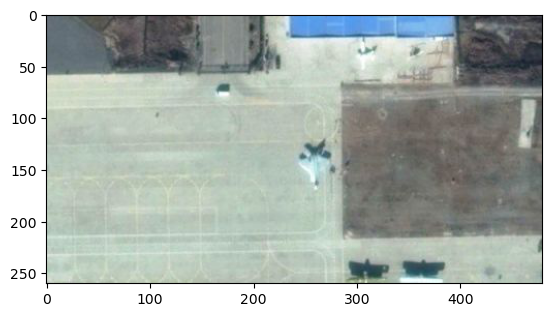

In [65]:
# see the aircraft..
img_for_display = load_img("f22.jpg")
plt.imshow(img_for_display)
plt.show()

## Model Prediction

In [66]:
preds = model.predict(img) 


In [67]:
# see prediction
preds

array([[2.1056170e-03, 6.9543568e-04, 8.9093915e-15, 9.9719894e-01,
        2.1176397e-11]], dtype=float32)

In [68]:
image_classes = ["A-10 Thunderbolt","Boeing B-52","Boeing E-3 Sentry","F-22 Raptor","KC-10 Extender"]

result = np.argmax(preds[0])
print(image_classes[result]) 

F-22 Raptor
